<a href="https://colab.research.google.com/github/Mi-cha-ela/Retail_demand_analysis/blob/main/01_data_extraction_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Laden session_base.csv aus SQL
- Datebtypen reparieren
- Outlier Removal/Clipping
- Entfernen gecancelter Trips
- Erstellen von session_base_clean.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn
# Set Seaborn style for nice visuals
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.facecolor"] = "white"

In [ ]:
import pandas as pd
from google.colab import files

# CSV von deinem Rechner hochladen
uploaded = files.upload()   # wähle hier 'Session_base3.csv' aus
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df.head()


Saving Session_base3 (1).csv to Session_base3 (1).csv


,session_id,user_id,trip_id,session_start,session_end,page_clicks,cancellation,flight_booked,hotel_booked,flight_discount,...,check_in_time,check_out_time,hotel_per_room_usd,birthdate,gender,married,home_country,home_city,home_airport,sign_up_date
0,519687-21acaeecdb2042b6b8003c5c95555d25,519687,NaN,2023-04-25 19:52:00,2023-04-25 19:52:44,6,False,False,False,False,...,NaN,NaN,NaN,1999-03-27,F,True,usa,laredo,LRD,2023-01-09
1,548967-91ba9f3f2c51468182ea9533d311f958,548967,NaN,2023-04-25 13:18:00,2023-04-25 13:20:11,18,False,False,False,False,...,NaN,NaN,NaN,1985-02-03,F,False,canada,toronto,YTZ,2023-01-23
2,647016-dddbe1c085644223bfc466c02383e46a,647016,NaN,2023-04-25 19:27:00,2023-04-25 19:28:14,10,False,False,False,True,...,NaN,NaN,NaN,1976-05-12,F,True,usa,knoxville,TYS,2023-03-08
3,659744-3ae1666a8fa146bf8690a0d8970a6652,659744,NaN,2023-04-25 21:58:00,2023-04-25 21:58:38,5,False,False,False,False,...,NaN,NaN,NaN,1975-12-16,F,True,canada,montreal,YMX,2023-03-13
4,497349-ace66f75368240649d8fe7fe0b2677c1,497349,NaN,2023-04-26 22:54:00,2023-04-26 22:54:39,5,False,False,False,False,...,NaN,NaN,NaN,1967-02-02,F,False,usa,reno,RNO,2022-12-29


In [ ]:
import numpy as np
import pandas as pd  # falls nicht mehr im Namespace

# 1) Negative / 0 Nächte auf 1 setzen
if 'nights' in df.columns:
    df['nights'] = df['nights'].fillna(1)
    df['nights'] = df['nights'].apply(lambda x: 1 if x <= 0 else x)

# 2) Datums-Spalten robust in datetime umwandeln
date_cols = [
    'session_start',
    'session_end',
    'departure_time',
    'return_time',
    'check_in_time',
    'check_out_time',
    'birthdate',
    'sign_up_date'
]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='mixed', errors='coerce')

# 3) Session-Dauer in Sekunden berechnen
df['session_duration'] = (df['session_end'] - df['session_start']).dt.total_seconds()

# 4) Ausreißer kappen – Page Clicks
if 'page_clicks' in df.columns:
    q1 = df['page_clicks'].quantile(0.25)
    q3 = df['page_clicks'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    df['page_clicks'] = df['page_clicks'].clip(upper=upper)

# 5) Ausreißer kappen – Session Duration
if 'session_duration' in df.columns:
    q1 = df['session_duration'].quantile(0.25)
    q3 = df['session_duration'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    df['session_duration'] = df['session_duration'].clip(upper=upper)

# 6) Als session_base_clean.csv speichern
df.to_csv('session_base_clean.csv', index=False)


In [ ]:
from google.colab import files
files.download('session_base_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['nights'] = df['nights'].apply(lambda x: 1 if x < 1 else x)


In [ ]:
df['session_start'] = pd.to_datetime(df['session_start'], errors='coerce')
df['session_end'] = pd.to_datetime(df['session_end'], errors='coerce')
df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce')
df['return_time'] = pd.to_datetime(df['return_time'], errors='coerce')
df['check_in_time'] = pd.to_datetime(df['check_in_time'], errors='coerce')
df['check_out_time'] = pd.to_datetime(df['check_out_time'], errors='coerce')



In [ ]:
# session Duration berechnen
df['session_duration'] = (df['session_end'] - df['session_start']).dt.total_seconds()
# Outlier clipping
df['page_clicks'] = df['page_clicks'].clip(upper=df['page_clicks'].quantile(0.99))
df['session_duration'] = df['session_duration'].clip(upper=df['session_duration'].quantile(0.99))



In [ ]:
df.to_csv("session_base_clean.csv", index=False)
print("session_base_clean.csv gespeichert!")


session_base_clean.csv gespeichert!


In [ ]:
# Page Clicks clppen
df['page_clicks'] = df['page_clicks'].clip(lower=0, upper=df['page_clicks'].quantile(0.99))

# Session Duration clippen
df['session_duration'] = df['session_duration'].clip(lower=0, upper=df['session_duration'].quantile(0.99))


In [ ]:
# 1) Alle Trip-IDs, die gecancelled wurden
cancelled_trips = df.loc[df['cancellation'] == True, 'trip_id'].dropna().unique()

# 2) Not-Cancel-Dataset erzeugen
df_not_cancel = df[df['trip_id'].notna() & ~df['trip_id'].isin(cancelled_trips)]

df_not_cancel.to_csv("not_cancel_trips.csv", index=False)

print("✓ not_cancel_trips.csv gespeichert!  Shape:", df_not_cancel.shape)


✓ not_cancel_trips.csv gespeichert!  Shape: (12620, 35)


In [ ]:
df_session = pd.read_csv("session_base_clean.csv")


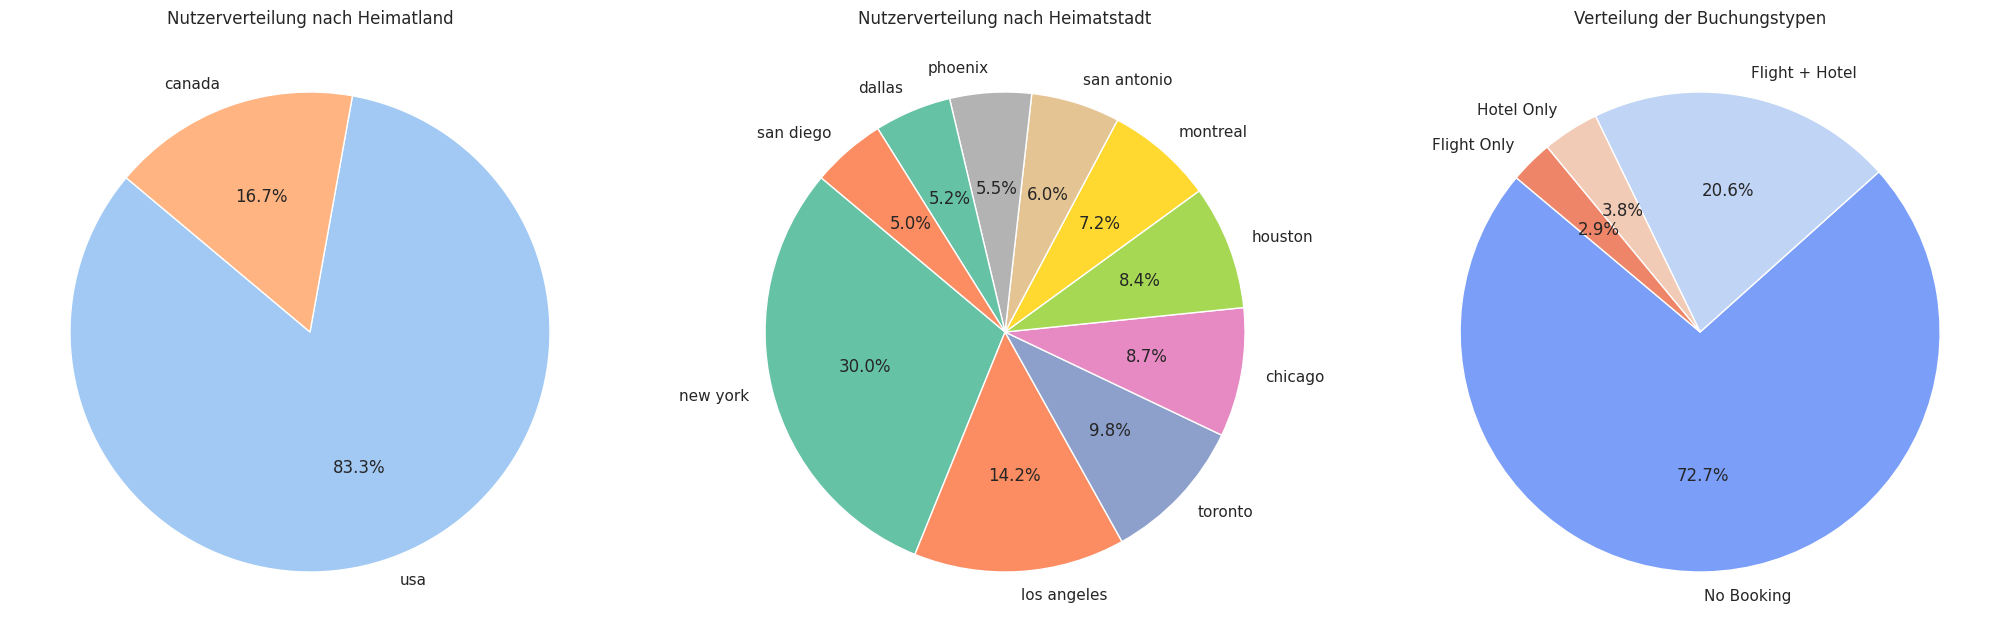

In [ ]:
df = df_session.copy()

# Home country counts (limit to top 10 for readability)
home_country_counts = df['home_country'].value_counts().head(10)

# Home city counts (limit to top 10 for readability)
home_city_counts = df['home_city'].value_counts().head(10)

# Booking type classification
def classify_booking(row):
    if row['flight_booked'] and row['hotel_booked']:
        return "Flight + Hotel"
    elif row['flight_booked']:
        return "Flight Only"
    elif row['hotel_booked']:
        return "Hotel Only"
    else:
        return "No Booking"

df['booking_type'] = df.apply(classify_booking, axis=1)
booking_counts = df['booking_type'].value_counts()


# Create horizontal figure layout

fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # 3 charts side by side

# --- Pie 1: Home Country ---
axes[0].pie(
    home_country_counts,
    labels=home_country_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel", len(home_country_counts))
)
axes[0].set_title("Nutzerverteilung nach Heimatland")

# --- Pie 2: Home City ---
axes[1].pie(
    home_city_counts,
    labels=home_city_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2", len(home_city_counts))
)
axes[1].set_title("Nutzerverteilung nach Heimatstadt")

# --- Pie 3: Booking Type ---
axes[2].pie(
    booking_counts,
    labels=booking_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("coolwarm", len(booking_counts))
)
axes[2].set_title("Verteilung der Buchungstypen")


# Final polish

plt.tight_layout(pad=3)
plt.show()# -----------------------------

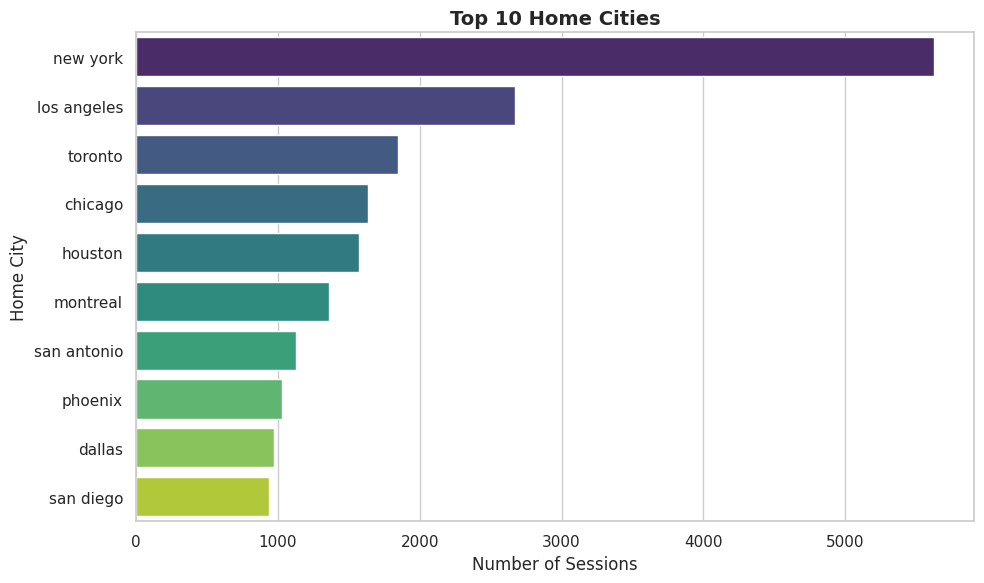

In [ ]:
df['home_city'].head()
df['home_city'].isna().mean()

top_dest_cities = df['home_city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_dest_cities.index,
    x=top_dest_cities.values,
    palette="viridis",
    hue=top_dest_cities.index, # Added to address FutureWarning
    legend=False # Added to address FutureWarning
)
plt.title("Top 10 Home Cities", fontsize=14, fontweight='bold')
plt.xlabel("Number of Sessions")
plt.ylabel("Home City")
plt.tight_layout()
plt.show()